# MetroBike Dataset Joining and Cleaning

In [1]:
# import libraries
import pandas as pd
import os
import numpy as np

In [2]:
# import MetroBike trip data
trip = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Austin_MetroBike_Trips_20240402.csv', dtype={9: str})

In [3]:
# import MetroBike kiosk data
kiosk = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Austin_MetroBike_Kiosk_Locations.csv')

## Clean MetroBike trip data

In [5]:
# Find stats for trip data
trip.describe().to_clipboard()

In [8]:
# find missing values in trip data
trip.isnull().sum().to_clipboard()

In [6]:
# explore null pass values
trip_pass = trip[trip['Membership or Pass Type'].isnull() == True]
trip_pass.to_clipboard()

In [7]:
# explore null checkout kiosk values
trip_checkout = trip[trip['Checkout Kiosk ID'].isnull() == True]
trip_checkout.to_clipboard()

In [8]:
# explore null checkout kiosk values
trip_return = trip[trip['Return Kiosk ID'].isnull() == True]
trip_return.to_clipboard()

#### I attempted below to use the kiosk name to fill in the kiosk id values but there is no reliable way to do it

In [39]:
# create a unique key for kiosk id and locations using checkout kiosk info
checkout_kiosk = trip[['Checkout Kiosk ID', 'Checkout Kiosk']].drop_duplicates()
checkout_kiosk.to_clipboard()

In [51]:
# remove missing values from kiosk unique key table
checkout_kiosk_clean = checkout_kiosk.dropna()
checkout_kiosk_clean.to_clipboard()

In [53]:
# create a unique key for kiosk id and locations using return kiosk info
return_kiosk = trip[['Return Kiosk ID', 'Return Kiosk']].drop_duplicates()
return_kiosk_clean = return_kiosk.dropna()
return_kiosk_clean.to_clipboard()

In [9]:
# update the kiosk id values where possible
trip.loc[trip['Checkout Kiosk'] == 'Dean Keeton & Speedway ', 'Checkout Kiosk ID'] = '3794'
trip.loc[trip['Return Kiosk'] == 'Dean Keeton & Speedway ', 'Return Kiosk ID'] = '3794'
trip.loc[trip['Return Kiosk'] == 'Dean Keeton/Speedway', 'Return Kiosk ID'] = '3794'
trip.loc[trip['Return Kiosk'] == '21st/Speedway @ PCL', 'Return Kiosk ID'] = '3798'


In [10]:
# drop all entries with missing values from trip table
trip_clean = trip.dropna().copy()
trip_clean.shape

(2118177, 14)

In [104]:
# check for duplicates
trip_dup = trip_clean[trip_clean.duplicated()]

print(trip_dup)

Empty DataFrame
Columns: [Trip ID, Membership or Pass Type, Bicycle ID, Bike Type, Checkout Datetime, Checkout Date, Checkout Time, Checkout Kiosk ID, Checkout Kiosk, Return Kiosk ID, Return Kiosk, Trip Duration Minutes, Month, Year]
Index: []


In [105]:
# check data types for trips table
trip_clean.dtypes

Trip ID                     int64
Membership or Pass Type    object
Bicycle ID                 object
Bike Type                  object
Checkout Datetime          object
Checkout Date              object
Checkout Time              object
Checkout Kiosk ID          object
Checkout Kiosk             object
Return Kiosk ID            object
Return Kiosk               object
Trip Duration Minutes       int64
Month                       int64
Year                        int64
dtype: object

In [4]:
# change dtypes for date/time variables
trip_clean['Checkout Datetime'] = pd.to_datetime(trip_clean['Checkout Datetime'])
trip_clean['Checkout Date'] = pd.to_datetime(trip_clean['Checkout Date'])
trip_clean['Checkout Time'] = pd.to_datetime(trip_clean['Checkout Time'], format = '%H:%M:%S').dt.time
trip_clean.dtypes.to_clipboard()

NameError: name 'trip_clean' is not defined

In [10]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

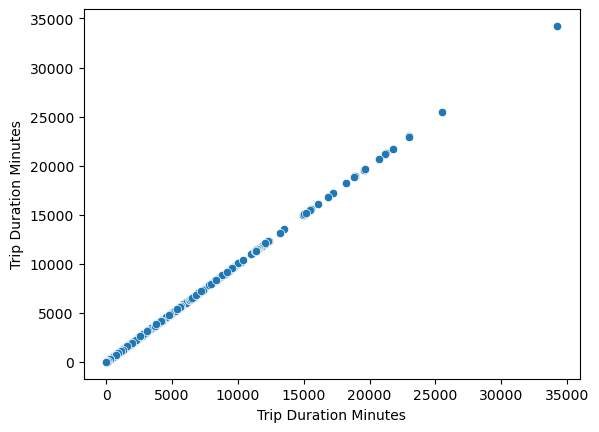

In [122]:
# check for duration outliers using scatterplot
length_scatter = sns.scatterplot(x = 'Trip Duration Minutes', y = 'Trip Duration Minutes', data = trip_clean)

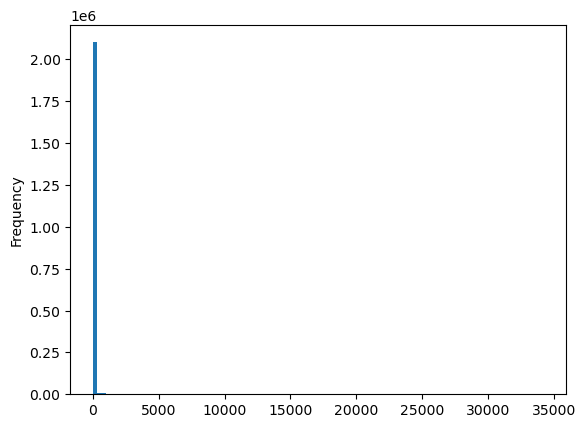

In [125]:
# check length distribution with scatterplot
length_hist = trip_clean['Trip Duration Minutes'].plot.hist(bins = 100)

In [14]:
trip_clean.shape

(2118177, 14)

In [17]:
# find number of entries with durations > 1500  
trip_over_1500 = trip_clean.loc[trip_clean['Trip Duration Minutes'] > 1500]
trip_over_1500.shape

(879, 14)

In [19]:
# find number of entries with durations > 1000  
trip_over_1000 = trip_clean.loc[trip_clean['Trip Duration Minutes'] > 1000]
trip_over_1000.shape

(3539, 14)

In [33]:
# find trip table statistics
trip_clean.describe().to_clipboard()

In [31]:
# check trip table
trip_clean.head()

,Trip ID,Membership or Pass Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,2496.0,8th & Congress,2495,4th & Congress,3,12,2017
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,2495.0,4th/Congress,2495,4th/Congress,14,3,2015
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,2712.0,Toomey Rd @ South Lamar,2575,Riverside/South Lamar,22,10,2014
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,2552.0,3rd/West,2496,8th/Congress,29,10,2014
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,2498.0,Dean Keeton/Speedway,2549,South 1st/Riverside @ Long Center,10,3,2015


In [35]:
# Export clean MetroBike trip data
trip_clean.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\MetroBikes Trip Clean.csv')

## Clean MetroBike Kiosk data

In [47]:
# find kiosk table stats
kiosk.describe().to_clipboard()
kiosk.shape

(102, 16)

In [ ]:
# find kiosk table dtypes
kiosk.dtypes.to_clipboard()

In [185]:
# rename duplicate kiosk id 2497 to 2498
kiosk.loc[(kiosk['Kiosk Name'] == '4th/Sabine'), 'Kiosk ID'] = 2498
kiosk['Kiosk ID'].value_counts().to_clipboard()

In [168]:
# create small kiosk table and change dtypes where appropriate
kiosk_small = kiosk[['Kiosk ID', 'Kiosk Status', 'Location', 'City Asset Number', 'Number of Docks', 'Council District']].copy()
kiosk_small['Kiosk Status'] = kiosk_small['Kiosk Status'].astype('category')
kiosk_small['Number of Docks'] = kiosk_small['Number of Docks'].astype('Int64')
kiosk_small['City Asset Number'] = kiosk_small['City Asset Number'].astype('Int64')
kiosk_small.dtypes.to_clipboard()

In [169]:
kiosk_small.shape

(102, 6)

In [171]:
# check for missing values
kiosk_small.isnull().sum()

Kiosk ID              0
Kiosk Status          0
Location              0
City Asset Number    24
Number of Docks      19
Council District      0
dtype: int64

In [63]:
# explore null City Asset Number 
kiosk_CAN_Null = kiosk_small[kiosk_small['City Asset Number'].isnull() == True]
kiosk_CAN_Null.to_clipboard()

In [64]:
# explore null Number of Docks
kiosk_NOD_Null = kiosk_small[kiosk_small['Number of Docks'].isnull() == True]
kiosk_NOD_Null.to_clipboard()

In [65]:
# check for duplicates
kiosk_dup = kiosk_small[kiosk_small.duplicated()]
print(kiosk_dup)

Empty DataFrame
Columns: [Kiosk ID, Kiosk Status, Location, City Asset Number, Number of Docks, Council District]
Index: []


In [66]:
# find kiosk table statistics
kiosk_small.describe().to_clipboard()

In [172]:
# export kiosk table
kiosk_small.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\MetroBikes Kiosk Clean.csv')

## Join and Clean Trip and Kiosk tables

In [69]:
# check column names for trip table
trip_clean.columns.to_list()

['Trip ID',
 'Membership or Pass Type',
 'Bicycle ID',
 'Bike Type',
 'Checkout Datetime',
 'Checkout Date',
 'Checkout Time',
 'Checkout Kiosk ID',
 'Checkout Kiosk',
 'Return Kiosk ID',
 'Return Kiosk',
 'Trip Duration Minutes',
 'Month',
 'Year']

In [70]:
# check column names for kiosk table
kiosk_small.columns.to_list()

['Kiosk ID',
 'Kiosk Status',
 'Location',
 'City Asset Number',
 'Number of Docks',
 'Council District']

In [114]:
# Return Kiosk ID has a non-numerical entry
trip_clean['Return Kiosk ID'].value_counts().to_clipboard()

In [117]:
# find all entries with Return Kiosk ID 'Event'
trip_clean[trip_clean['Return Kiosk ID'] == 'Event'].to_clipboard()

In [120]:
# replace 'Event' with '50' in Return Kiosk ID 
trip_clean['Return Kiosk ID'] = trip_clean['Return Kiosk ID'].replace('Event', 50)
trip_clean['Return Kiosk ID'].value_counts().to_clipboard()

In [173]:
# change dtype of Kiosk ID columns to match
kiosk_small['Kiosk ID'] = kiosk_small['Kiosk ID'].astype('int')
trip_clean['Checkout Kiosk ID'] = trip_clean['Checkout Kiosk ID'].astype('float').astype('int')
trip_clean['Return Kiosk ID'] = trip_clean['Return Kiosk ID'].astype('int')
kiosk_small.dtypes

Kiosk ID                int32
Kiosk Status         category
Location               object
City Asset Number       Int64
Number of Docks         Int64
Council District        int64
dtype: object

In [174]:
# make new kiosk tables for checkout and return
kiosk_checkout = kiosk_small.copy()
kiosk_checkout.columns = ['Checkout ' + col for col in kiosk_checkout.columns]

kiosk_return = kiosk_small.copy()
kiosk_return.columns =  ['Return ' + col for col in kiosk_return.columns]

In [175]:
# merge trip table with checkout kiosk info
checkout_merge = pd.merge(trip_clean, kiosk_checkout, on = 'Checkout Kiosk ID', how = 'left')
full_merge = pd.merge(checkout_merge, kiosk_return, on = 'Return Kiosk ID', how = 'left')

In [176]:
# reorder new merged table columns
full_merge = full_merge[['Trip ID', 'Membership or Pass Type', 'Bicycle ID', 'Bike Type',
       'Checkout Datetime', 'Checkout Date', 'Checkout Time',
       'Checkout Kiosk ID', 'Checkout Kiosk', 'Checkout Kiosk Status', 'Checkout Location',
       'Checkout City Asset Number', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year','Return Kiosk ID',
       'Return Kiosk', 
        'Return Kiosk Status', 'Return Location',
       'Return City Asset Number', 'Return Number of Docks',
       'Return Council District']]

In [177]:
full_merge.shape

(2118177, 24)

In [178]:
# find entries with null values
full_merge.isnull().sum().to_clipboard()

In [133]:
# find data types for merged table
full_merge.dtypes.to_clipboard()

In [134]:
# explore null checkout kiosk status values
merge_COstatus_NA = full_merge[full_merge['Checkout Kiosk Status'].isnull() == True]
merge_COstatus_NA.to_clipboard()

In [179]:
# find merged table statistics
full_merge.describe().to_clipboard()

In [144]:
# find entries with number of docks of 0
no_docks = full_merge[full_merge['Checkout Number of Docks'] == 0]
no_docks.to_clipboard()

In [180]:
# change number of docks with '0' to '10'
full_merge['Checkout Number of Docks'] = full_merge['Checkout Number of Docks'].replace(0, 10)
full_merge['Return Number of Docks'] = full_merge['Return Number of Docks'].replace(0, 10)
no_docks = full_merge[full_merge['Checkout Number of Docks'] == 0]
no_docks.shape

(0, 24)

In [181]:
# export merged table
full_merge.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Full Merge.csv')

In [5]:
# import metrobike merged table
merge = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Full Merge.csv')

In [6]:
# create tables with shorter trip durations
short_trips = merge[merge['Trip Duration Minutes'] < 1440]
shorter_trips = merge[merge['Trip Duration Minutes'] < 200]
shortest_trips = merge[merge['Trip Duration Minutes'] < 120]

In [7]:
short_trips.shape

(2117211, 25)

<Axes: xlabel='Trip Duration Minutes', ylabel='Count'>

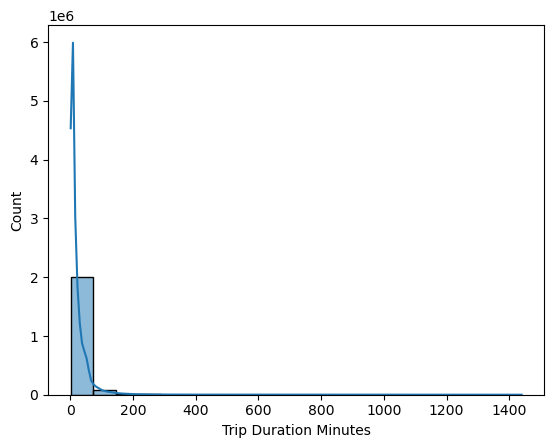

In [12]:
# create histogram for short trips durations
sns.histplot(short_trips['Trip Duration Minutes'], bins = 20, kde = True)

In [14]:
shorter_trips.shape

(2092000, 25)

<Axes: xlabel='Trip Duration Minutes', ylabel='Count'>

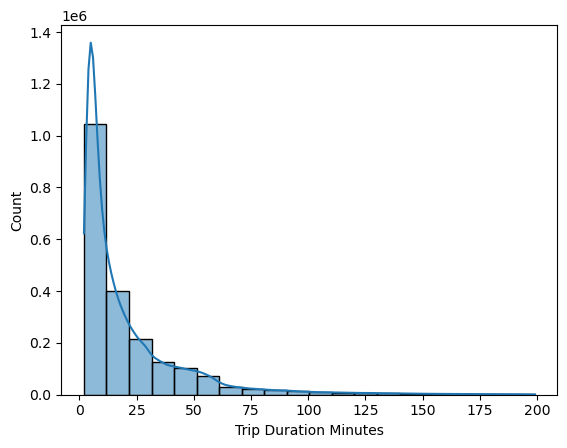

In [15]:
# create histogram for shorter trips durations
sns.histplot(shorter_trips['Trip Duration Minutes'], bins = 20, kde = True)

<Axes: xlabel='Trip Duration Minutes', ylabel='Count'>

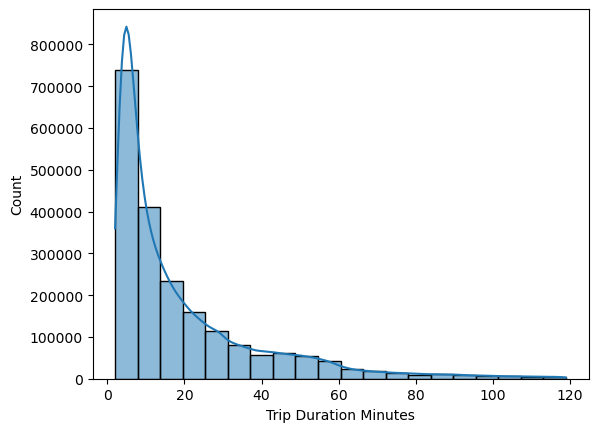

In [19]:
# create histogram for shortest trips durations
sns.histplot(shortest_trips['Trip Duration Minutes'], bins = 20, kde = True)

In [18]:
shortest_trips.shape

(2062967, 25)

In [20]:
# save shorter trip table for further analysis
shorter_trips.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Short Trips Merge.csv')